

# Test Sigmoid, Tanh, and Relu Activations Functions on the MNIST Dataset
## Table of Contents
In this lab, you will test sigmoid, tanh, and relu activation functions on the MNIST dataset.

* Neural Network Module and Training Function
* Make Some Data
* Define Several Neural Network, Criterion Function, and Optimizer
* Test Sigmoid, Tanh, and Relu
* Analyze Results



In [7]:
# Import thelibraries we need for this lab

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import matplotlib.pylab as plt
import numpy as np

## Neural Network Module and Training Function

In [2]:
# Build the Model with sigmoid function
class Net(nn.Module):
  # Constructor
  def __init__(self, D_in, H, D_out):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  # Prediction
  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x

Define the neural network module or class using the Tanh activation function

In [3]:
# Build the model with tanh function

class NetTanh(nn.Module):
  # Constructor
  def __init__(self, D_in, H, D_out):
    super(NetTanh, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  # Prediction
  def forward(self, x):
    x = torch.tanh(self.linear1(x))
    x = self.linear2(x)
    return x

Define the neural network module or class using the Relu activation function

In [4]:
# Build the model with Relu function

class NetRelu(nn.Module):
  # Contructor
  def __init__(self, D_in, H, D_out):
    super(NetRelu, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  # Prediction
  def forward(self, x):
    x = torch.relu(self.linear1(x))
    x = self.linear2(x)
    return  x

In [5]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())
            
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
        
    return useful_stuff

# Making some data
Load the training dataset by setting the parameters `train` to `True` and convet it to a tensor by replacing a transform object in the argument `transform`

In [8]:
# training dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform = transforms.ToTensor() )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Load the testing dataset by setting the parameter train to False and convert it to a tensor by placing a transform object in the argument transform.

In [9]:
validation_dataset = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())

Create the criterion funciont or loss 

In [11]:
len(train_dataset)

60000

In [10]:
criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader object:


In [12]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle = True)
validation_loader =  torch.utils.data.DataLoader(dataset=validation_dataset, batch_size = 5000, shuffle = False )

In [14]:
len(validation_dataset)

10000

# Define the Neural Network, Criterion Function, Optimizer, and Train the Model

In [15]:
criterion = nn.CrossEntropyLoss()

Create the model with 100 hidden neurons:  


In [16]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

# Test Sigmoid, Tanh, and Relu

In [23]:
# Train the network by using the sigmoid activation function

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs =30)

Train the network by using the Tanh activations function:

In [24]:
# Train a model with Tanh function

model_Tanh = NetTanh(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=30)

Train the network by using the Relu activations function:


In [20]:
modelRelu = NetRelu(input_dim, hidden_dim, output_dim)
optimizer =  torch.optim.SGD(modelRelu.parameters(), lr = learning_rate)
training_result_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs =30)

# Analyze Results

compare the training loss for each activation

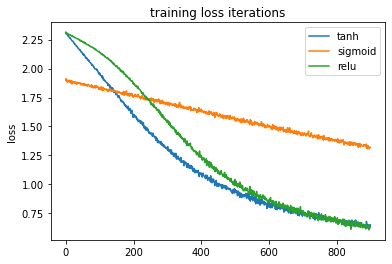

In [29]:
# Compare the training loss
plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label = 'sigmoid')
plt.plot(training_result_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

Compare the validation loss for each model:  


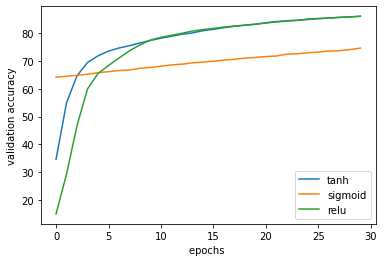

In [30]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label='tanh')
plt.plot(training_results['validation_accuracy'], label='sigmoid')
plt.plot(training_result_relu['validation_accuracy'], label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()